In [343]:
import pandas as pd
%matplotlib inline
import pylab as P

In [344]:
titanic = pd.read_csv('train.csv', header=0)

In [345]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [346]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [347]:
titanic['Gender'] = titanic['Sex'].map({'female':1, 'male':0}).astype(int)

In [348]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189C6D14518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000189C69D8160>]], dtype=object)

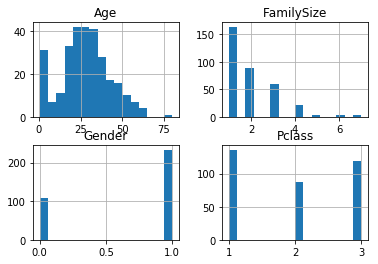

In [349]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1


titanic[titanic.Survived>0][['Pclass', 'Age', 'Gender', 'FamilySize']].hist(bins=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189C5A3AD68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000189C1861F60>]], dtype=object)

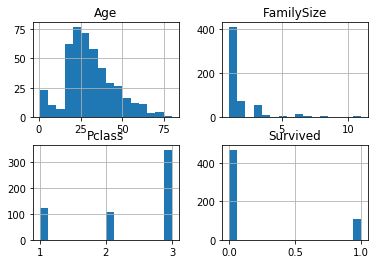

In [350]:
titanic[titanic.Sex=='male'][['Pclass', 'Age', 'Survived', 'FamilySize']].hist(bins=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189C376A5C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000189C8DD3B38>]], dtype=object)

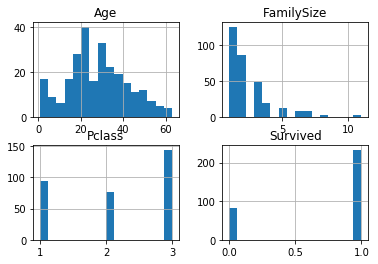

In [351]:
titanic[titanic.Sex=='female'][['Pclass', 'Age', 'Survived', 'FamilySize']].hist(bins=16)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189C91E3128>]], dtype=object)

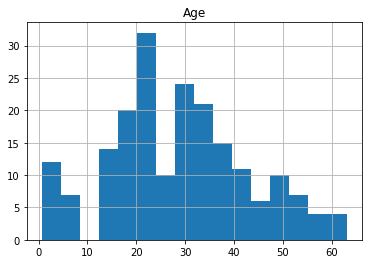

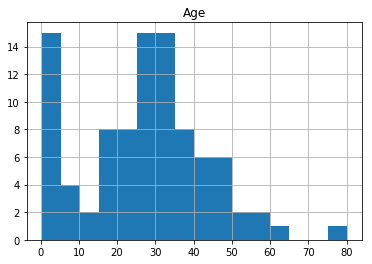

In [352]:
titanic[titanic.Survived==1][titanic.Sex=='female'][['Age']].hist(bins=16)
titanic[titanic.Survived==1][titanic.Sex=='male'][['Age']].hist(bins=16)

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64
Pclass
1    0.370370
2    0.527174
3    0.757637
dtype: float64
        survived      dead
Pclass                    
1       0.629630  0.370370
2       0.472826  0.527174
3       0.242363  0.757637


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000189C93077B8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000189C93E4320>], dtype=object)

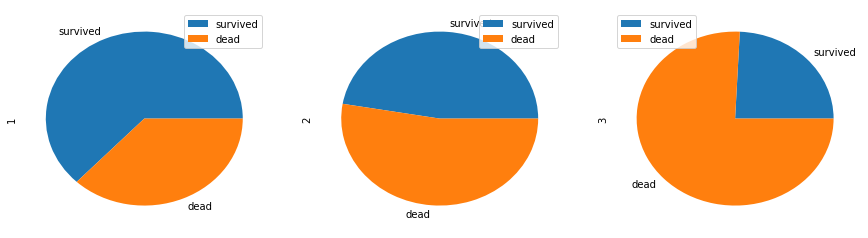

In [353]:
#The following is a function that will be used to get the Survival Ratio by comparing different parameters to each other
#and undertand the raltionship between them

def prop(df, column, val):
    return len(df[df[column]==val])/len(df[column])

#Here I grouped my survival ratio based on the Pclass of the passengers, which gives me 2 types of data sets
#according to the values in the Survival Column
titanic_survived = titanic.groupby(titanic.Pclass).apply(prop, 'Survived', 1)
print(titanic_survived)
titanic_died = titanic.groupby(titanic.Pclass).apply(prop, 'Survived', 0)
print(titanic_died)

#The concat function is used to arrange data along an axis, by either using the 'union logic (0)' or the 'intersection logic (1)'
#so it arranges data obtained in two columns instead of one
titanic_survClass = pd.concat([titanic_survived, titanic_died], axis=1)
titanic_survClass.rename(columns={0:'survived', 1:'dead'}, inplace=True)
print(titanic_survClass)

#The 'T' before 'plot' stands for Transpose and it reverses/flips the way data is presented. Here I want to see the survival
#ratio for each class separately instead of expressing it collectively in two pie charts (survived, dead)
titanic_survClass.T.plot(kind='pie', subplots=True, figsize=(15, 4))

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64


Survival ratio
Pclass Sex                   
1      female        0.968085
       male          0.368852
2      female        0.921053
       male          0.157407
3      female        0.500000
       male          0.135447

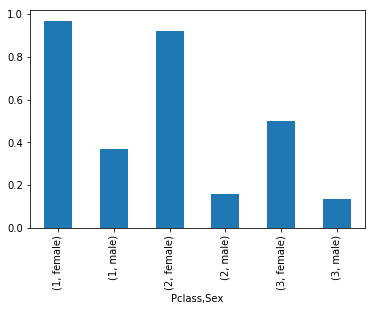

In [354]:
#Here I grouped the data which are to be compared together with respect to the values obtained from the previous function, 
#then converted the Series into a DataFrame for better representation and renamed my last column
titanic_survivedSex = titanic.groupby(['Pclass','Sex']).apply(prop, 'Survived', 1)
print(titanic_survivedSex)
titanic_survivedSex.T.plot(kind='bar')
titanic_survived_frame = titanic_survivedSex.to_frame()
titanic_survived_frame.rename(columns={0:'Survival ratio'})

In [358]:
#copy DataFrame so that it won't modify my original
titanic_ageCategories = titanic.copy()

#qcut divides "Age" into 3 categories
titanic_ageCategories['Age'] = pd.qcut(titanic_ageCategories.Age, 4)

#This prints the "Age" categories I created with the number of passengers for each range
print(titanic_ageCategories.groupby(['Age']).apply(len))

#Here I grouped my data which are to be compared together with respect to the values obtained from the previous function, 
#then converted the Series into a DataFrame for better representation and renamed my last column
titanic_ageCategories = titanic_ageCategories.groupby(['Age', 'Pclass', 'Sex']).apply(prop, 'Survived', 1)
titanic_age_frame = titanic_ageCategories.to_frame()
titanic_age_frame.rename(columns={0:'Survival ratio'})

Age
(0.419, 20.125]    179
(20.125, 28.0]     183
(28.0, 38.0]       175
(38.0, 80.0]       177
dtype: int64


Survival ratio
Age             Pclass Sex                   
(0.419, 20.125] 1      female        0.928571
                       male          0.571429
                2      female        1.000000
                       male          0.526316
                3      female        0.510638
                       male          0.197368
(20.125, 28.0]  1      female        0.933333
                       male          0.562500
                2      female        0.863636
                       male          0.000000
                3      female        0.538462
                       male          0.126582
(28.0, 38.0]    1      female        1.000000
                       male          0.500000
                2      female        0.950000
                       male          0.096774
                3      female        0.470588
                       male          0.169492
(38.0, 80.0]    1      female        0.968750
                       male          0.277778
                2      female        0.875000
                       male          0.083333
                3      female        0.083333
                       male          0.076923

In [359]:
#Refer to the previous function for details
titanic_family_size_survived = titanic.groupby(['FamilySize']).apply(prop,'Survived',1)
titanic_family_size_died = titanic.groupby(['FamilySize']).apply(prop,'Survived',0)

titanic_family = pd.concat([titanic_family_size_survived, titanic_family_size_died], axis=1)
titanic_family.rename(columns={0:'survived', 1:'dead'}, inplace=True)

print(titanic_family)

            survived      dead
FamilySize                    
1           0.303538  0.696462
2           0.552795  0.447205
3           0.578431  0.421569
4           0.724138  0.275862
5           0.200000  0.800000
6           0.136364  0.863636
7           0.333333  0.666667
8           0.000000  1.000000
11          0.000000  1.000000


In [321]:
#from the above results, we can notice that:

#Sex:
#the Sex attribute gives a good prediction of survival - In this case, Females ranked very high compared to Males

#Class:
#Also, Females in Pclass 1 had a better chance in surviving than their peers in the other Pclasses, and Males follow accordingly
#whereas Females from Pclass 3 had the lowest ratio between females from higher classes

#Family Size:
#With regard to Family Size, passengers traveling alone had a low chance in survival compared to others traveling with family 
#members between 2~4 ..Though, Families with members more than 4 had a lower chance than those with a smaller-sized family

#Age:
#It can be seen that Females and Males in Pclass 1 from almost all ages, had a high survival ratio compared to the lower classes
#Yet, the younger the Female age is, the better are the chances for survival for all Pclasses except for the Older Females in
#Pclass 1 and Pclass 2, as their chances are almost as high.
#Males survival rate is low in general, but the younger the Male is and the higher the Pclass, the highier their survival ratio
#is